In [1]:
# K-Nearest Neighbors is an algorithm for supervised learning. Where the data is 'trained' with data points corresponding to their classification.
# Once a point is to be predicted, it takes into the account the 'K' nearest points to it to determine it's classification.

In [3]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [4]:
# Load Data From CSV File

In [5]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [6]:
# Data Visualization and Analysis

In [7]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002049D468D30>]],
      dtype=object)

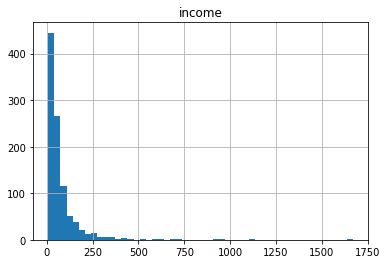

In [8]:
# define Plus Service = 281, Basic Service = 266, Total Service = 236 and E-Service = 217 Customers

df.hist(column = 'income', bins=50)

In [9]:
# Feature Set

In [10]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [11]:
# To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:

X = df[['region', 'tenure','age','marital','address','income','ed','employ','retire','gender','reside']].values   #.astype(float)
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [12]:
# What are our labels?

In [13]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

In [14]:
# Normalize Data

In [15]:
# Data Standardization give data zero mean and unit  variance , it is good practice, especially, for alogithms such as KNN whicj is based on distance of cases:

In [16]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [17]:
# TRAIN TEST SPLIT

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=4)
print('Train Set:' , X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)

Train Set: (800, 11) (800,)
Test set:  (200, 11) (200,)


In [19]:
# CLASSIFICATION 
# K nearest neighbor (KNN)
# import Library

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
# Training

In [22]:
# Lets start the algo with k=4 for now:
k = 4


In [23]:
#Train Model and predict
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [24]:
# Predicting

In [25]:
y_hat = neigh.predict(X_test)
y_hat[0:5]

array([1, 1, 3, 2, 4], dtype=int64)

In [26]:
# Accuracy evaluation

In [28]:
##  In multilabel classification, accuracy classification score is a function that computes subset accuracy. 
## This function is equal to the jaccard_similarity_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

In [29]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_hat))

Train set Accuracy:  0.5475
Test set Accuracy:  0.32


In [30]:
# Lets start the algo with k=4 for now:
k = 6

# Train Model and predict
neigh_ = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)

# predict
y_hat1 = neigh_.predict(X_test)
y_hat1[0:5]

array([3, 3, 3, 4, 4], dtype=int64)

In [31]:
# from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh_.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_hat1))

Train set Accuracy:  0.51625
Test set Accuracy:  0.31


In [32]:
## What about other K?

In [33]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1, Ks):
    
    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    y_hat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_hat)
    
    std_acc[n-1] = np.std(y_hat == y_test) / np.sqrt(y_hat.shape[0])
   
mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

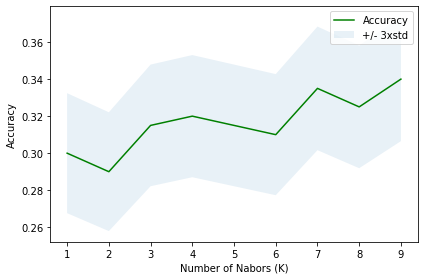

In [35]:
plt.plot(range(1,Ks), mean_acc, 'g')
plt.fill_between(range(1,Ks), mean_acc - 1 * std_acc, mean_acc + 1 *std_acc, alpha=0.10)
plt.legend(('Accuracy', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [36]:
print("The Best accuracy was with", mean_acc.max(), "with k=",mean_acc.argmax()+1)

The Best accuracy was with 0.34 with k= 9
